# Default of credit card clients Data Set
### Cristian Ferney Caicedo
### Christian David Cardona
### Jonathan Smith Llanos

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1O3viIXyAB9E1z09hyQqPw8HtcF5QQt4H"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2022-11-18 04:03:37--  https://docs.google.com/uc?export=download&confirm=&id=1O3viIXyAB9E1z09hyQqPw8HtcF5QQt4H
Resolving docs.google.com (docs.google.com)... 172.253.63.100, 172.253.63.101, 172.253.63.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j44t2fd75ovm4cg4aj2j4bf2ch07d4s1/1668744150000/04733746419931218404/*/1O3viIXyAB9E1z09hyQqPw8HtcF5QQt4H?e=download&uuid=3fdbcfef-834c-45c1-a59b-50923cfb21d0 [following]
--2022-11-18 04:03:40--  https://doc-0o-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j44t2fd75ovm4cg4aj2j4bf2ch07d4s1/1668744150000/04733746419931218404/*/1O3viIXyAB9E1z09hyQqPw8HtcF5QQt4H?e=download&uuid=3fdbcfef-834c-45c1-a59b-50923cfb21d0
Resolving doc-0o-28-docs.googleusercontent.com (doc-0o-28-docs.googleusercontent.com)... 142.251.16.132, 2

In [2]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importamos las librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras

import pandas as pd
%matplotlib inline
csv_path = 'default of credit card clients.xls'
Xdata = pd.read_excel(csv_path)

col_rename = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
              'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
              'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Payment Next Mont']
Xdata.columns = col_rename
Xdata.drop(index = 0, columns="ID", inplace = True)
Xdata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Payment Next Mont
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Verificamos datos del DataFrame:

In [4]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LIMIT_BAL                  30000 non-null  object
 1   SEX                        30000 non-null  object
 2   EDUCATION                  30000 non-null  object
 3   MARRIAGE                   30000 non-null  object
 4   AGE                        30000 non-null  object
 5   PAY_0                      30000 non-null  object
 6   PAY_2                      30000 non-null  object
 7   PAY_3                      30000 non-null  object
 8   PAY_4                      30000 non-null  object
 9   PAY_5                      30000 non-null  object
 10  PAY_6                      30000 non-null  object
 11  BILL_AMT1                  30000 non-null  object
 12  BILL_AMT2                  30000 non-null  object
 13  BILL_AMT3                  30000 non-null  object
 14  BILL_A

Convertimos los valores tipo objeto del DataFrame a enteros

In [5]:
Xdata=Xdata.astype('int')
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int64
 2   EDUCATION                  30000 non-null  int64
 3   MARRIAGE                   30000 non-null  int64
 4   AGE                        30000 non-null  int64
 5   PAY_0                      30000 non-null  int64
 6   PAY_2                      30000 non-null  int64
 7   PAY_3                      30000 non-null  int64
 8   PAY_4                      30000 non-null  int64
 9   PAY_5                      30000 non-null  int64
 10  PAY_6                      30000 non-null  int64
 11  BILL_AMT1                  30000 non-null  int64
 12  BILL_AMT2                  30000 non-null  int64
 13  BILL_AMT3                  30000 non-null  int64
 14  BILL_AMT4             

# Analisis exploratorio:

### Histograma de todos los atributos:

In [6]:
Xdata2 = Xdata.drop(columns="LIMIT_BAL")

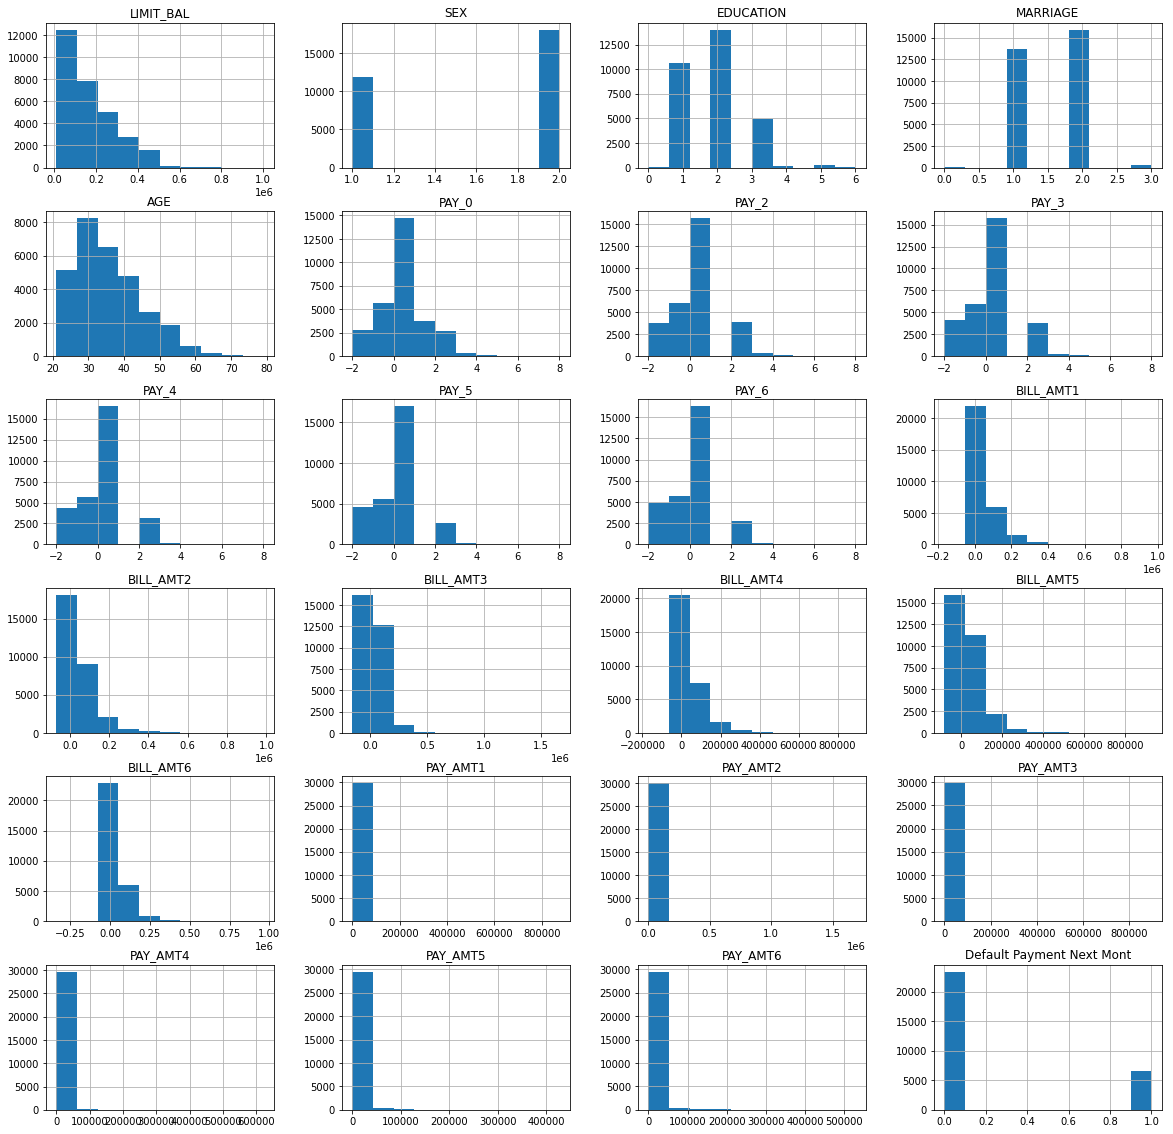

In [7]:
Xdata.hist(layout=(6,4),figsize=(20,20))
plt.show()

### Analisis exploratorio:

### Analizaremos el monto de credito otorgado por educación:

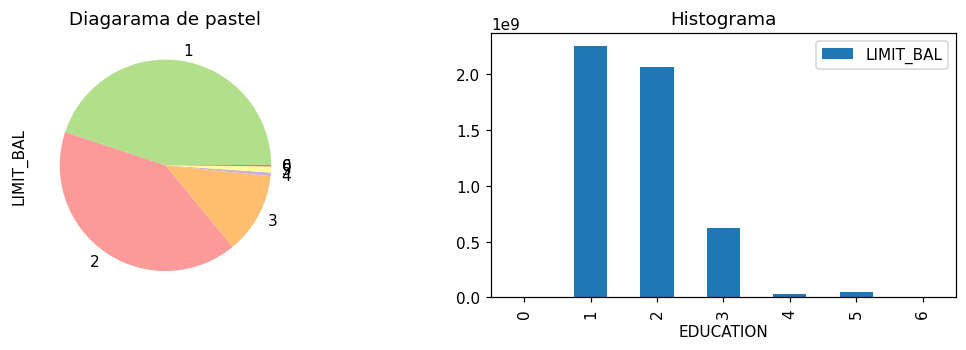

In [8]:
plt.figure(figsize=(12,7), dpi=110)
plt.subplot(221)
Xdata["LIMIT_BAL"].groupby(Xdata["EDUCATION"]).sum().plot(kind='pie', cmap='Paired')
plt.title("Diagarama de pastel")

plt.subplot(222)
Xdata.groupby("EDUCATION")["LIMIT_BAL"].sum().plot(kind='bar', legend='Reverse',)
plt.title("Histograma")

plt.show()

Donde:

**1** indica doctorado

**2** indica pregrado

**3** indica bachillerato

**4 en adelante** otros

*Vemos que a las personas con doctorado se les hizo un préstamo mayor que el resto*

### Analizaremos el monto de credito otorgado por género:

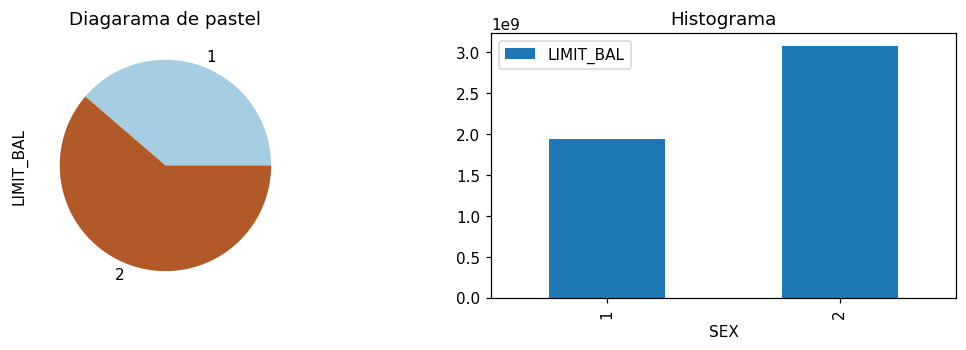

In [9]:
plt.figure(figsize=(12,7), dpi=110)
plt.subplot(221)
Xdata["LIMIT_BAL"].groupby(Xdata["SEX"]).sum().plot(kind='pie', cmap='Paired')
plt.title("Diagarama de pastel")

plt.subplot(222)
Xdata.groupby("SEX")["LIMIT_BAL"].sum().plot(kind='bar', legend='Reverse',)
plt.title("Histograma")

plt.show()

Indicando que **'1' equivale a los hombres** y **'2' a las mujeres**

*Vemos que a las mujeres se le hizo un prestamo mayor que a los hombres*

In [10]:
genero = np.array(Xdata["SEX"])
count2 = np.zeros(4)
# count2[0] es hombre negado
# count2[1] es hombre aceptado
# count2[3] es mujer negada
# count2[4] es mujer aceptada
for i in range (30000):
  if (genero[i]==1):
    count2[0] = count2[0]+1
  if (genero[i]==2):
    count2[1] = count2[1]+1

print(count2[0])
print(count2[1])
total = count2[0]+count2[1]
hombres = count2[0]/total*100
mujeres = count2[1]/total*100
print(hombres, mujeres)

11888.0
18112.0
39.626666666666665 60.373333333333335


Text(0.5, 1.0, 'QUANTITY MEN VS WOMEN')

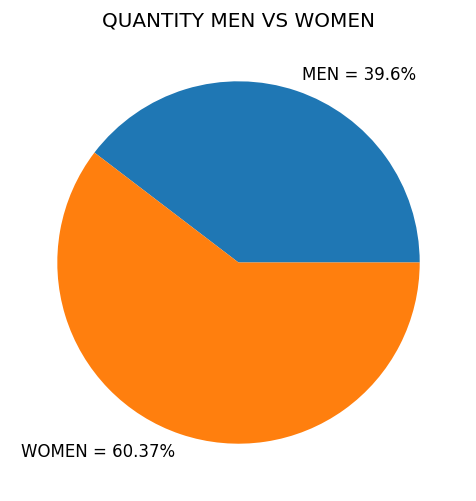

In [11]:
probabilidad_m = [hombres, mujeres]
nombres3 =["MEN = 39.6%", "WOMEN = 60.37%"]

plt.figure(figsize=(7, 5), dpi=120)
plt.pie(probabilidad_m, labels=nombres3)
plt.title("QUANTITY MEN VS WOMEN")

### Calculamos la probabilidad de credibilidad de clientes:

---



In [12]:
y_train2 = np.array(Xdata["Default Payment Next Mont"])
y_train2.shape

(30000,)

In [13]:
i=0
count = np.zeros(2)
for i in range (30000):
  if y_train2[i]==0:
    count[0] = count[0]+1
  else:
    count[1] = count[1]+1
  i = i+1

total = count[0]+count[1]
si = count[1]/total*100
no = count[0]/total*100
print("La probabilidad de clientes no creibles es:",no, "La probabilidad de clientes creibles es:", si)

La probabilidad de clientes no creibles es: 77.88000000000001 La probabilidad de clientes creibles es: 22.12


### Calculamos la probabilidad de credibilidad a clientes por incumpliento de pago:

#### Tomando en cuenta el género:

In [14]:
genero = np.array(Xdata["SEX"])
count2 = np.zeros(4)
# count2[0] es hombre negado
# count2[1] es hombre aceptado
# count2[3] es mujer negada
# count2[4] es mujer aceptada
for i in range (30000):
  if (genero[i]==1 and y_train2[i]==0):
    count2[0] = count2[0]+1
  if (genero[i]==1 and y_train2[i]==1):
    count2[1] = count2[1]+1
  if (genero[i]==2 and y_train2[i]==0):
    count2[2] = count2[2]+1
  if (genero[i]==2 and y_train2[i]==1):
    count2[3] = count2[3]+1

total_h = count2[0]+count2[1]
total_m = count2[2]+count2[3]
hombre_no = count2[0]/total_h*100
hombre_si = count2[1]/total_h*100
mujer_no = count2[2]/total_m*100
mujer_si = count2[3]/total_m*100

print("La probabilidad de clientes hombres no creibles es:",hombre_no, "La probabilidad de hombres creibles es", hombre_si)
print("La probabilidad de mujeres no creibles es:",mujer_no, "La probabilidad de mujeres creibles es:",mujer_si)

La probabilidad de clientes hombres no creibles es: 75.83277254374158 La probabilidad de hombres creibles es 24.16722745625841
La probabilidad de mujeres no creibles es: 79.22371908127208 La probabilidad de mujeres creibles es: 20.776280918727917


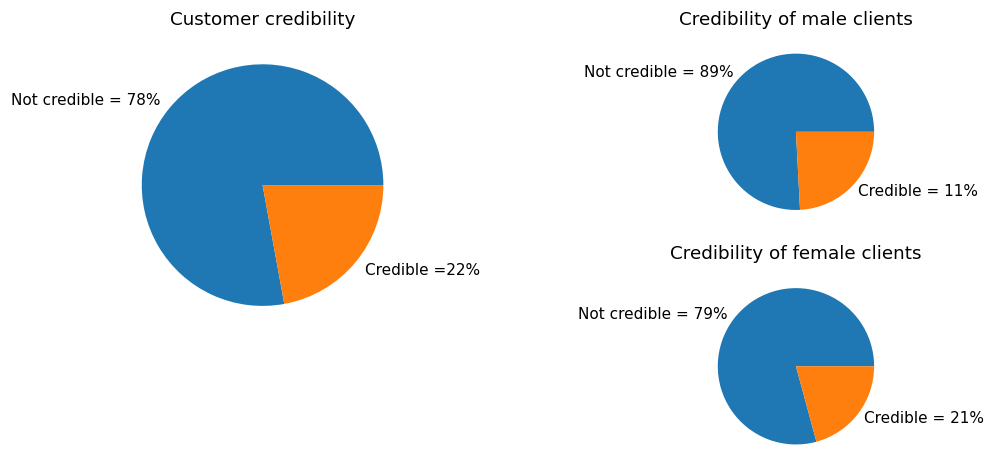

In [15]:
probabilidad = [no,si]
nombres = ["Not credible = 78%","Credible =22%"]

probabilidad_h = [hombre_no, hombre_si]
nombres2 =["Not credible = 89%", "Credible = 11%"]

probabilidad_m = [mujer_no, mujer_si]
nombres3 =["Not credible = 79%", "Credible = 21%"]

plt.figure(figsize=(10, 8), dpi=110)
plt.subplot(221)
plt.pie(probabilidad, labels=nombres)
plt.title("Customer credibility")

plt.subplot(333)
plt.pie(probabilidad_h, labels=nombres2)
plt.title("Credibility of male clients")

plt.subplot(336)
plt.pie(probabilidad_m, labels=nombres3)
plt.title("Credibility of female clients")

plt.show()

#### Tomando en cuenta la educación:

In [16]:
educacion = np.array(Xdata["EDUCATION"])
count3 = np.zeros(6)
# count3[0] es Doctorado creible
# count3[1] es Doctorado no creible
# count3[2] es pregrado creible
# count3[3] es pregrado no creible
# count3[4] es bachillerato creible
# count3[5] es bacchillerato no creible
for i in range (30000):
  if (educacion[i]==1 and y_train2[i]==0):
    count3[0] = count3[0]+1
  if (educacion[i]==1 and y_train2[i]==1):
    count3[1] = count3[1]+1
  if (educacion[i]==2 and y_train2[i]==0):
    count3[2] = count3[2]+1
  if (educacion[i]==2 and y_train2[i]==1):
    count3[3] = count3[3]+1
  if (educacion[i]==3 and y_train2[i]==1):
    count3[4] = count3[4]+1
  if (educacion[i]==3 and y_train2[i]==1):
    count3[5] = count3[5]+1

total_d = count3[0]+count3[1]
total_p = count3[2]+count3[3]
total_b = count3[4]+count3[5]

doctorado_no = count3[0]/total_d*100
doctorado_si = count3[1]/total_d*100

pregrado_no = count3[2]/total_p*100
pregrado_si = count3[3]/total_p*100

bachillerato_no = count3[4]/total_b*100
bachillerato_si = count3[5]/total_b*100

print("La probabilidad de clientes con doctorado no creibles es:",doctorado_no, "La probabilidad de clientes con doctorado creibles es", doctorado_si)
print("La probabilidad de clientes con pregrado no creibles es:",pregrado_no, "La probabilidad de clientes con pregrado creibles es:",pregrado_si)
print("La probabilidad de clientes con bachillerato no creibles es:",bachillerato_no, "La probabilidad de clientes con bachillerato creibles es:",bachillerato_si)

La probabilidad de clientes con doctorado no creibles es: 80.76523382144543 La probabilidad de clientes con doctorado creibles es 19.23476617855456
La probabilidad de clientes con pregrado no creibles es: 76.26514611546685 La probabilidad de clientes con pregrado creibles es: 23.734853884533145
La probabilidad de clientes con bachillerato no creibles es: 50.0 La probabilidad de clientes con bachillerato creibles es: 50.0


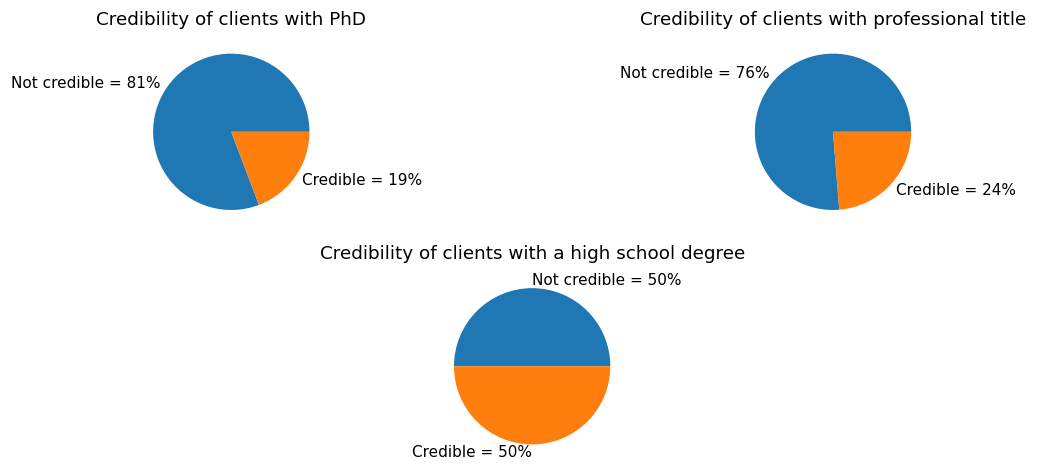

In [17]:
probabilidad_d = [doctorado_no, doctorado_si]
nombres4 =["Not credible = 81%", "Credible = 19%"]

probabilidad_p = [pregrado_no, pregrado_si]
nombres5 =["Not credible = 76%", "Credible = 24%"]

probabilidad_b = [bachillerato_no, bachillerato_si]
nombres6 =["Not credible = 50%", "Credible = 50%"]

plt.figure(figsize=(10, 8), dpi=110)
plt.subplot(331)
plt.pie(probabilidad_d, labels=nombres4)
plt.title("Credibility of clients with PhD")

plt.subplot(333)
plt.pie(probabilidad_p, labels=nombres5)
plt.title("Credibility of clients with professional title")

plt.subplot(335)
plt.pie(probabilidad_b, labels=nombres6)
plt.title("Credibility of clients with a high school degree")

plt.show()

# Dividimos la base de datos en Entrenamiento, Validación y Test:

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
salida = 'Default Payment Next Mont'
y_data = Xdata[salida]
X_data = Xdata.drop(columns='Default Payment Next Mont')
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_data, y_data):
    X_train_full = X_data.iloc[train_index]
    X_test = X_data.iloc[test_index]
    y_train_full = y_data.iloc[train_index]
    y_test = y_data.iloc[test_index]
    
for train_index, valid_index in split.split(X_train_full, y_train_full):
    X_train = X_train_full.iloc[train_index]
    X_valid = X_train_full.iloc[valid_index]
    y_train = y_train_full.iloc[train_index]
    y_valid = y_train_full.iloc[valid_index]   

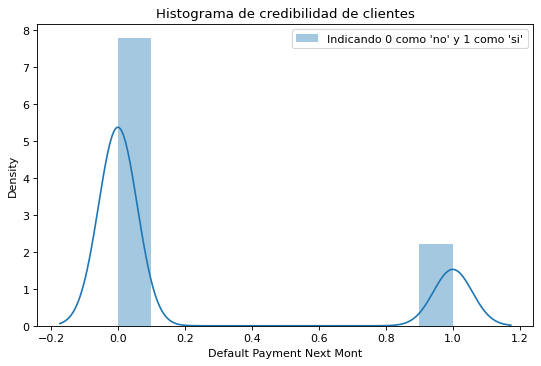

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 5), dpi=80)
sns.distplot(y_train, bins=10, label="Indicando 0 como 'no' y 1 como 'si'")
plt.title("Histograma de credibilidad de clientes")
plt.legend()
plt.show()

### Diagrama de dispersión:

In [20]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(X_train)
zpca.shape

(19200, 2)

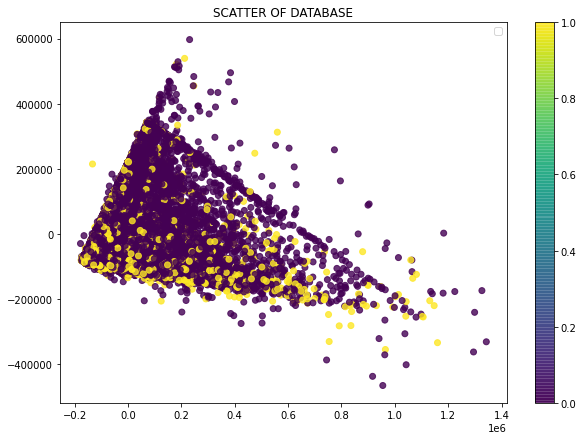

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(zpca[:,0],zpca[:,1],c=y_train, alpha=0.8)
plt.title("SCATTER OF DATABASE")
plt.legend()
plt.colorbar()
plt.show()

## Matriz de correlación:

In [22]:
corr_matrix = Xdata.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Payment Next Mont
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


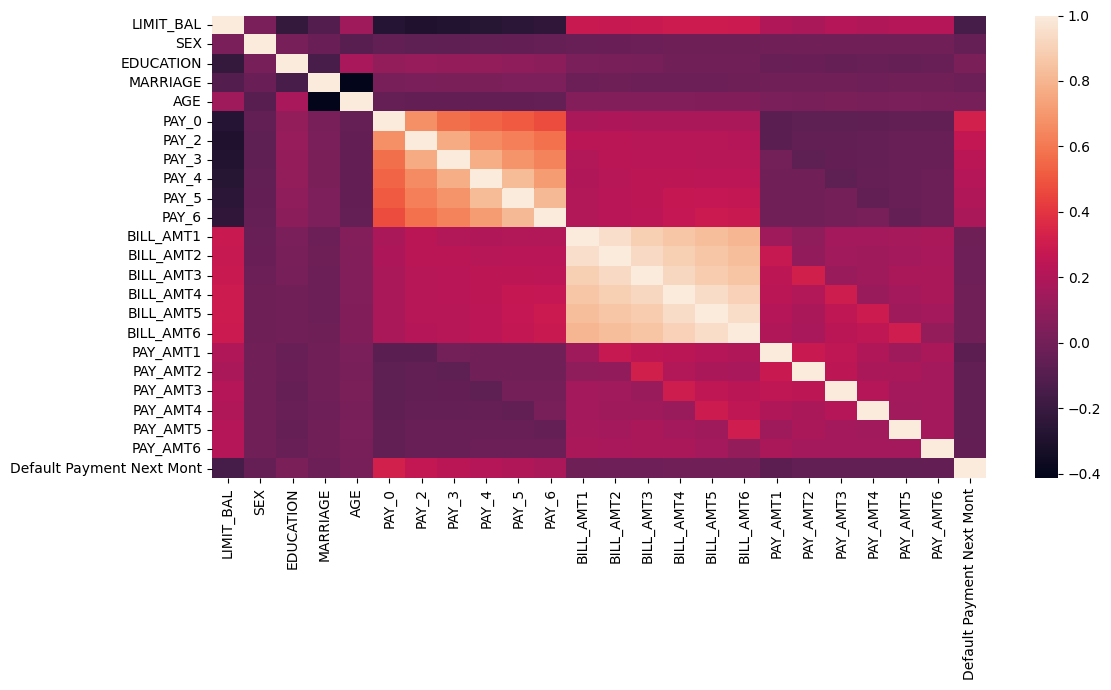

In [23]:
import seaborn as sns
plt.figure(figsize=(12,7), dpi=100)
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
#plt.savefig('results/corr_matrix.pdf', format='pdf', dpi=300)
plt.show()

# Normalizamos con StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Realizamos modelo con Redes Neuronales Funcionales

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (InputLayer)        [(None, 23)]              0         
                                                                 
 h1 (Dense)                  (None, 300)               7200      
                                                                 
 h2 (Dense)                  (None, 150)               45150     
                                                                 
 h3 (Dense)                  (None, 75)                11325     
                                                                 
 h4 (Dense)                  (None, 30)                2280      
                                                                 
 output (Dense)              (None, 1)                 31        
                                                                 
Total params: 65,986
Trainable params: 65,986
Non-trainable p

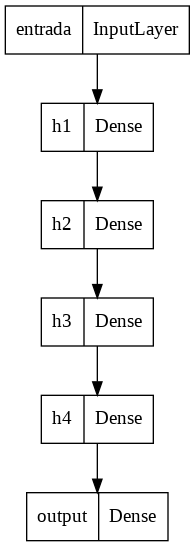

In [25]:
input_l = tf.keras.layers.Input(shape=(X_train.shape[1:]), name='entrada')
h1 = tf.keras.layers.Dense(300,activation='tanh',name='h1')(input_l)
h2 = tf.keras.layers.Dense(150,activation='tanh',name='h2')(h1)
h3 = tf.keras.layers.Dense(75,activation='tanh',name='h3')(h2)
h4 = tf.keras.layers.Dense(30,activation='tanh',name='h4')(h3)
output = tf.keras.layers.Dense(1,activation="sigmoid",name='output')(h4)
model_fun = tf.keras.Model(inputs=input_l,outputs=output)
model_fun.summary()
tf.keras.utils.plot_model(model_fun)

## Compilamos modelo:

In [26]:
model_fun.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Entrenamos el modelo:

In [27]:

history = model_fun.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))


Epoch 1/100
600/600 [==============================] - 8s 6ms/step - loss: 0.4683 - accuracy: 0.8070 - val_loss: 0.4565 - val_accuracy: 0.8140
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4449 - accuracy: 0.8159 - val_loss: 0.4508 - val_accuracy: 0.8152
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4406 - accuracy: 0.8172 - val_loss: 0.4476 - val_accuracy: 0.8121
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4383 - accuracy: 0.8181 - val_loss: 0.4457 - val_accuracy: 0.8138
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4368 - accuracy: 0.8189 - val_loss: 0.4442 - val_accuracy: 0.8165
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4352 - accuracy: 0.8195 - val_loss: 0.4450 - val_accuracy: 0.8146
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4342 - accuracy: 0.8191 - val_loss: 0.4417 - val_accuracy: 0.8181


### Graficamos la relación entre el loss y el accuracy


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
0

0

### Evaluamos el modelo:

In [30]:
model_fun.evaluate(X_test, y_test)

188/188 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.8132


[0.4393600523471832, 0.8131666779518127]

# Realizamos las predicciones:

In [31]:
defi = model_fun.predict(X_test) #output
defi.shape

188/188 [==============================] - 0s 1ms/step


(6000, 1)

## Curva ROC:

In [32]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, defi)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

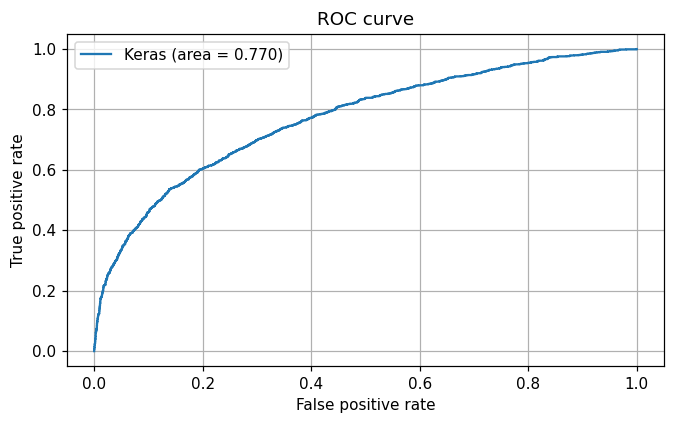

In [33]:
plt.figure(figsize=(7,4), dpi=110)
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

## Matriz de confusion

In [34]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
          
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [35]:

defi_b = (defi>=0.5).astype("int").ravel()
no = np.array(['No confiable'])
si = np.array(['Confiable'])
a = np.concatenate((no,si))

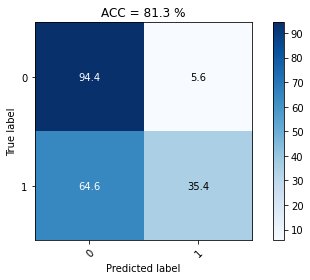

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels

acc = accuracy_score(y_test, defi_b)
plot_confusion_matrix(y_test, defi_b, normalize=True, title='ACC = %.1f %%' % (100*acc))
plt.autoscale()                  
plt.show()

## Analisis exploratorio PCA por capas:

600/600 [==============================] - 1s 1ms/step


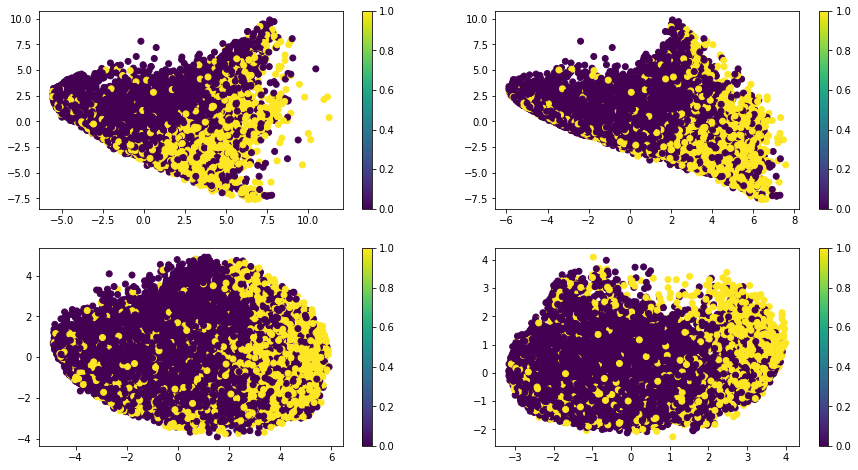

In [37]:
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h1').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modleo ya esta ajustado!
zb = model_B.predict(X_train) # salida en h4
zpcb = PCA(n_components=2).fit_transform(zb)

model_C = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_C) # modleo ya esta ajustado!
zc = model_C.predict(X_train) # salida en h4
zpcc = PCA(n_components=2).fit_transform(zc)

model_D = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h3').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_D) # modleo ya esta ajustado!
zd = model_D.predict(X_train) # salida en h4
zpcd = PCA(n_components=2).fit_transform(zd)

model_E = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h4').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_E) # modleo ya esta ajustado!
ze = model_E.predict(X_train) # salida en h4
zpce = PCA(n_components=2).fit_transform(ze)

plt.figure(figsize=(15,8))

plt.subplot(221)
plt.scatter(zpcb[:,0],zpcb[:,1],c=y_train)
plt.colorbar()

plt.subplot(222)
plt.scatter(zpcc[:,0],zpcb[:,1],c=y_train)
plt.colorbar()

plt.subplot(223)
plt.scatter(zpcd[:,0],zpcd[:,1],c=y_train)
plt.colorbar()

plt.subplot(224)
plt.scatter(zpce[:,0],zpce[:,1],c=y_train)
plt.colorbar()
plt.show()

In [38]:
X_train.shape

(19200, 23)

In [39]:
X_train_full.shape

(24000, 23)

In [40]:
print(X_data.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(30000, 23)
(19200, 23)
(4800, 23)
(6000, 23)


In [41]:
print(y_data.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(30000,)
(19200,)
(4800,)
(6000,)
